Dataset Columns: ['Project_ID', 'Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth', 'Weather_Index', 'Construction_Cost']
Selected Features after Lasso Regression: ['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth']


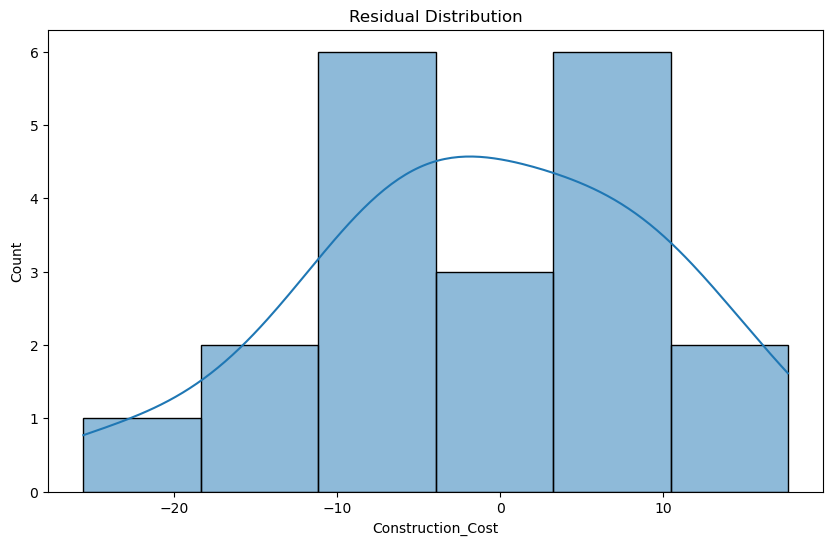

Number of Outliers Detected: 0
Variance Inflation Factor (VIF) values:
                  Feature        VIF
0                   const  34.439671
1         Building_Height   1.082905
2  Material_Quality_Index   1.123889
3              Labor_Cost   1.133905
4       Concrete_Strength   1.041824
5        Foundation_Depth   1.049488
For deployment, real-time data sources such as material cost indexes and weather conditions can enhance accuracy.
Errors in cost predictions can lead to financial losses or safety risks. Overestimations may reduce competitiveness, while underestimations may cause budget overruns.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy import stats
df = pd.read_csv(r"C:\Users\madha\Downloads\Civil_Engineering_Regression_Dataset.csv")
df.columns = df.columns.str.strip()
print("Dataset Columns:", df.columns.tolist())
cost_column = "Construction_Cost"
if cost_column not in df.columns:
    raise KeyError(f"Column '{cost_column}' not found in dataset. Available columns: {df.columns.tolist()}")
independent_vars = ["Building_Height", "Material_Quality_Index", "Labor_Cost", "Concrete_Strength", "Foundation_Depth"]
for var in independent_vars:
    if var not in df.columns:
        raise KeyError(f"Column '{var}' not found in dataset. Available columns: {df.columns.tolist()}")
dependent_var = df[cost_column]
X = df[independent_vars]
y = dependent_var
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
selected_features = [var for var, coef in zip(independent_vars, lasso.coef_) if coef != 0]
print("Selected Features after Lasso Regression:", selected_features)
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model = LinearRegression()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()
z_scores = np.abs(stats.zscore(df[independent_vars]))
outliers = (z_scores > 3).any(axis=1)
print("Number of Outliers Detected:", outliers.sum())
X_with_const = sm.add_constant(X_train_selected)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print("Variance Inflation Factor (VIF) values:")
print(vif_data)
print("For deployment, real-time data sources such as material cost indexes and weather conditions can enhance accuracy.")
print("Errors in cost predictions can lead to financial losses or safety risks. Overestimations may reduce competitiveness, while underestimations may cause budget overruns.")
